# **プログラミング基礎第10回**

---

In [1]:
# Jupyter で matplotlib を使うためのおまじない
%matplotlib inline
# Matplotlib の pyplot を取り込んで plt の名前で使う
import matplotlib.pyplot as plt
# NumPy を取り込んで np の名前で使う
import numpy as np

## 演習1
武蔵野市は[令和7年5月1日現在](https://www.city.musashino.lg.jp/_res/common/opendata_shimin/1050834/202505nenreibetsu.xlsx)の年齢別人口を示している。このデータ(主に水色部分)から10歳刻みの人口の合計一覧(下記左側)と、全体に占める割合(%)の円グラフ(右側)を表示するプログラムを作成せよ。なお、90歳以上は一つにまとめ、グラフでは20歳代と90歳以上を引き出すこと。プログラム中では Excel 表の値のみを使い、加算した値は用いないこと。テキスト出力とグラフを横に並べる必要はない。

令和7年5月1日現在の武蔵野市の人口
年齢 | 小計
0  - |  10869
10  - |  12240
20  - |  18052
30  - |  19662
40  - |  22363
50  - |  22555
60  - |  16269
70  - |  14103
80  - |  9160
90  - |  3170
合計 | 148443


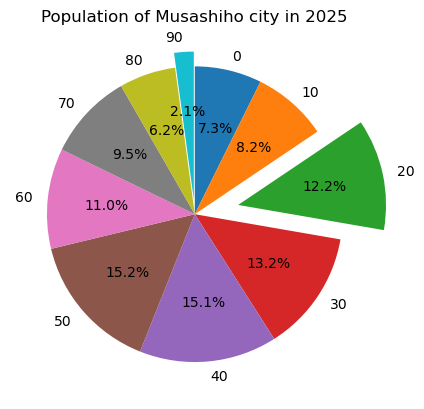

In [3]:
data = [4921,5948,6165,6075,8271,9781,9838,9824,10872,11491,12015,10540,8909,7360,6735,7368,5442,3718,2278,892]

sumdata = []
lbs = range(0,100,10)

# 偶数のrangeをつくってリスト追加
print("令和7年5月1日現在の武蔵野市の人口")
print("年齢 | 小計")
for i in range(0, len(data), 2):
    s = data[i] + data[i+1]
    lbso = lbs[i//2]
    print(lbso," - | ",s)
    sumdata.append(s)
total = sum(sumdata)
print("合計 |", total)


pct = '%.1f%%' 
exp = [0,0,0.3,0,0,0,0,0,0,0.1]
plt.pie(sumdata, labels=lbs,autopct=pct,startangle=90, explode=exp,counterclock=False) 
plt.title('Population of Musashiho city in 2025')
plt.show()


## 演習2

$y = 4x^2 + 8x + 1$ と $y = 4x^3 + 2x^2 - 8x + 3$ の二つの多項式のグラフを以下の条件でプロットするプログラムを作成せよ。 

- x軸の範囲を $−3\leqq x \leqq 3$ とする 
- x軸方向の値の変化を0.1ずつとする 
- グラフのタイトルとx, y 軸のラベルも表示する 
- 凡例をつけて、グリッドを表示する 
- 資料の `draw_graph()` 関数を用いる 

In [5]:
def graph_title_label(title, xlbl, ylbl):
    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)

def draw_simple_graph(x, y, title, xlbl, ylbl):
    graph_title_label(title, xlbl, ylbl)
    plt.plot(x, y)
    plt.show()

def draw_graph(data, title, xlbl, ylbl, show=True):
    graph_title_label(title, xlbl, ylbl)
    for x, y, lbl in data:
        plt.plot(x, y, label=lbl)
    
    if len(data) > 1: 
        plt.legend()
    
    if show:
        plt.show()

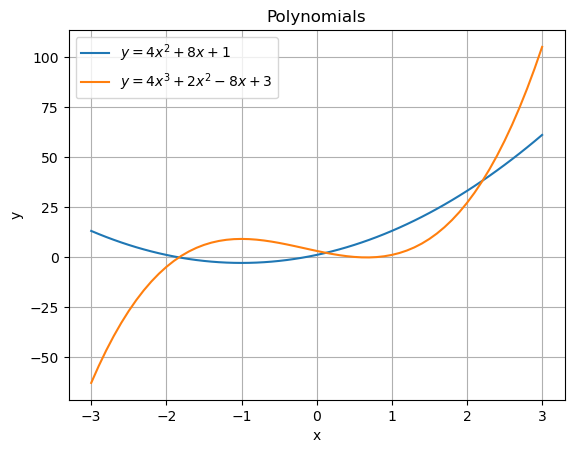

In [6]:
x = np.arange(-3.0, 3.1, 0.1)

y1 = 4 * x**2 + 8 * x + 1
y2 = 4 * x**3 + 2 * x**2 - 8 * x + 3


plot_data = [
    (x, y1, r'$y = 4x^2 + 8x + 1$'),
    (x, y2, r'$y = 4x^3 + 2x^2 - 8x + 3$')
]
plt.grid(True)
draw_graph(data=plot_data, 
           title='Polynomials', 
           xlbl='x', 
           ylbl='y')


## 演習3

投射運動のプログラムを改良して、初速度 vlist=[40, 30] (m/s)、角度 dlist=[45, 30] 度のリストに対して、その組み合わせの結果グラフを描画できるようにせよ。 

In [10]:
def trajectory(v, a):
    theta = np.radians(a)
    g = 9.8 # 重力加速度(m/s^2)
    t_flight = 2 * v * np.sin(theta) / g # 飛行時間
    
    # ここから配列データ
    t = np.arange(0, t_flight, 0.01) # 時間間隔
    x = v * np.cos(theta) * t
    y = v * np.sin(theta) * t - 0.5 * g * t**2
    
    # ラベルを作成
    lbl = 'v:' + str(v) + ', a:' + str(a)
    return (x, y, lbl) # タプルにして返す

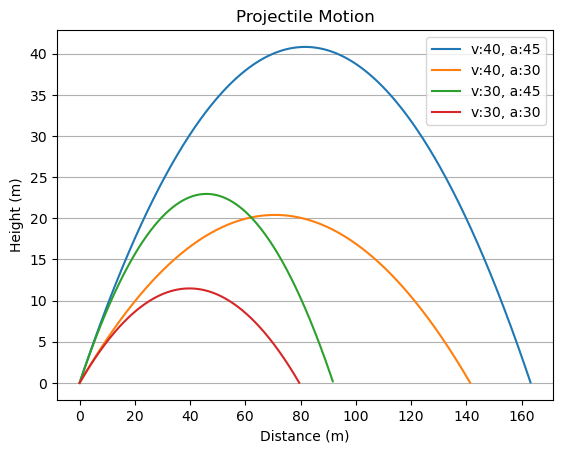

In [9]:
vlist = [40, 30] 
alist = [45, 30]  

plot_data = []

for v_val in vlist:
    for a_val in alist:
        plot_data.append(trajectory(v_val, a_val))

plt.grid(True)

plt.grid(axis='x')
draw_graph(
    data=plot_data,
    title='Projectile Motion',
    xlbl='Distance (m)',
    ylbl='Height (m)'
)